# Teil 2 - Explorative Analyse

# 1. Vorstellung der Daten - deskriptiver Teil

Die vorliegenden Datensätze sind Spotify-Songs, 
Datensatz 1 sind die 10 000 erfolgreichsten Songs von Spotify, ausgewählt anhand der Billboard Charts und der australischen ARIA Charts, um eine gewisse gesellschaftliche Relevanz zu repräsentieren. 
(Quelle: https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now)

Datensatz 2 beinhaltet fast eine Millionen Songs inklusive der Spotify-Daten und der Songtexte - durch die Größe dieses Datensatzes ergibt sich eine repräsentative Auswahl an Musik, deren Analyse sicher interessant ist. Im ersten Teil haben wir schon sehr viele Duplikate entfernt, weswegen es noch etwa 800.000 Songs sind. Diese Songs wurden anhand verschiedener Kaggle-Datensätze zusammengestellt. 
(Quelle: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics)

Datensatz 3 haben wir im ersten Teil dieser Analyse erstellt, indem wir den ersten und zweiten miteinander vereint haben und die Lyrics-Spalte der gemeinsamen Songs an den Datensatz der 10.000 Songs angehängt haben. Dabei herausgekommen sind 5831 Songs mit Songtexten, die in beiden Datensätzen identifizierbar waren. Diese werden interessant im dritten Teil, der Textanalyse.

Erstmal schauen wir uns die Daten an, sie beinhalten neben den essentiellen Daten Songtitel und Künstlername beinhalten die Datensätze noch die Attribute, die Spotify mitliefert, ich nenne sie hier die "Spotify-Attribute", nach denen die Songs bewertet und kategorisiert wurden. Teilweise sind das schon verarbeitete Werte wie "Danceability" oder "Speechiness", die mehrere Faktoren zusammenrechnen und anhand derer eine Kategorisierung vornehmen. Ein Song ist zum Beispiel tanzbar, wenn er einen stabilen Rhythmus hat, das Tempo eher schneller ist und die Rhythmus-Sektion gut hörbar. Das findet sich im Wert "Danceability" wieder. "Speechiness" gibt an, ob und wie viel Sprache in einem Stück vorkommt, wobei Spotify selbst angibt, Werte unter 0.33 sind eher ohne Sprache und Werte über 0.66 sind eher nur Sprache, kaum bis keine Musik. 
Es gibt aber auch direkter messbare Werte wie die Länge (in Millisekunden) und Tempo des Songs, sowie Metadaten wie Release-Termin und Track Nummer auf dem Album.

In Datensatz 2 haben wir ähnliche Daten, weniger Metadaten, dafür Songtexte. 

Schauen wir uns die Daten an:

In [4]:
import pandas as pd

df1 = pd.read_csv('df1_filtered.csv')
df2 = pd.read_csv('unique_df2.csv')
df3 = pd.read_csv('df_merged.csv')

## Datensatz1: DF1 - 9993 Einträge

| Index | Spaltenname                     | Beschreibung                                                                | Datentyp   | Anzahl der Einträge |
|-------|---------------------------------|-----------------------------------------------------------------------------|------------|---------------------|
| 00    | Track URI                       | Die Track ID bei Spotify                                                    | object     | 9993                |
| 01    | Track Name                      | Der Songtitel                                                               | object     | 9993                |
| 02    | Artist URI(s)                   | Die Artist-ID von Spotify                                                   | object     | 9993                |
| 03    | Artist Name(s)                  | Die Namen der Künstler                                                      | object     | 9993                |
| 04    | Album URI                       | Die Album-ID von Spotify                                                    | object     | 9993                |
| 05    | Album Name                      | Der Name des Albums                                                         | object     | 9993                |
| 06    | Album Artist URI(s)             | Die Album Artist ID bei Spotify                                             | object     | 9993                |
| 07    | Album Artist Name(s)            | Der Name des Album-Künstlers                                                | object     | 9993                |
| 08    | Album Release Date              | Das Veröffentlichungsdatum des Albums                                       | object     | 9993                |
| 09    | Album Image URL                 | Die URL zum Albumcover                                                      | object     | 9993                |
| 10    | Disc Number                     | Anzahl der Discs des Albums                                                 | object     | 9993                |
| 11    | Track Number                    | Die Nummer des Songs auf dem Album                                          | int64      | 9993                |
| 12    | Track Duration (ms)             | Die Dauer des Titels in Millisekunden                                       | int64      | 9993                |
| 13    | Track Preview URL               | Die URL zum reinhören in den Titel                                          | object     | 9994                |
| 14    | Explicit                        | Beinhaltet der Text explizite Ausdrücke?                                    | bool       | 9993                |
| 15    | Popularity                      | Der Popularity-Grad, wie erfolgreich ist der Song von 1-100                 | int64      | 9993                |
| 16    | ISRC                            | Die ISRC-Bestellnummer für das Album                                        | object     | 9993                |
| 17    | Added By                        | Wer hat diesen Titel dieser Liste hinzugefügt?                              | object     | 9993                |
| 18    | Added At                        | Wann wurde dieser Titel dieser Liste hinzugefügt?                           | object     | 9993                |
| 19    | Artist Genres                   | Genreauflistung, die passend zum Künstler sind                              | object     | 9993                |
| 20    | Danceability                    | Wie tanzbar ist der Song? Bewertet nach Tempo, Rhythmus-Stabilität Rhythmusstärke, Wert zwischen 0 und 1                             | float64    | 9993                |
| 21    | Energy                          | Wie viel Energie hat der Song, Laustärke, Intensität und Aktivität. Zwischen 0 und 1   | float64    | 9993                |
| 22    | Key                             | Tonart als Ganzzahl zwischen 0 und 11                                       | float64    | 9993                |
| 23    | Loudness                        | Durchschnittlicher Wert der Lautheit eines Songs                            | float64    | 9993                |
| 24    | Mode                            | Gibt an, ob ein Song eher Dur oder Moll ist                                 | float64    | 9993                |
| 25    | Speechiness                     | Gibt an, wie hoch der Anteil an gesprochenem Wort in einem Stück ist        | float64    | 9993                |
| 26    | Acousticness                    | Ein Vertrauensmaß, wie akustisch (oder elektronisch) ist der Song           | float64    | 9993                |
| 27    | Instrumentalness                | Ein Wahrscheinlichkeitswert dafür, dass der Song instrumental ist           | float64    | 9993                |
| 28    | Liveness                        | Wie wahrscheinlich ist dieser Song live aufgenommen wurden?                 | float64    | 9993                |
| 29    | Valence                         | Wie positiv ist ein Song                                                    | float64    | 9993                |
| 30    | Tempo                           | Geschätztes Tempo des Songs in bpm                                          | float64    | 9993                |
| 31    | Time Signature                  | Die Taktart eines Songs                                                     | float64    | 9993                |
| 32    | Label                           | Das Plattenlabel, das die Veröffentlichung herausgebracht hat               | object     | 9990                |
| 33    | Label                           | Das Plattenlabel, das sie Veröffentlichung herausgebracht hat               | object     | 9990                |
| 33    | Copyrights                      | Der Copyright-Status des Songs                                              | object     | 9974                |
| 34    | Release Year                    | Das Jahr der Veröffentlichung                                               | int64      | 9993                |
| 35    | Release Month                   | Der Monat der Veröffentlichung (wenn nicht vorhanden: 0)                    | int64      | 9993                |
| 36    | Release Day                     | Der Tag der Veröffentlichung (wenn nicht vorhanden: 0)                      | int64      | 9993                |

In [2]:
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9993 non-null   object 
 1   Track Name            9993 non-null   object 
 2   Artist URI(s)         9993 non-null   object 
 3   Artist Name(s)        9993 non-null   object 
 4   Album URI             9993 non-null   object 
 5   Album Name            9993 non-null   object 
 6   Album Artist URI(s)   9993 non-null   object 
 7   Album Artist Name(s)  9993 non-null   object 
 8   Album Release Date    9993 non-null   object 
 9   Album Image URL       9993 non-null   object 
 10  Disc Number           9993 non-null   int64  
 11  Track Number          9993 non-null   int64  
 12  Track Duration (ms)   9993 non-null   int64  
 13  Track Preview URL     9934 non-null   object 
 14  Explicit              9993 non-null   bool   
 15  Popularity           

## Datensatz2: DF2 - 794360 Einträge

| Index | Spaltenname                     | Beschreibung                                                                | Datentyp   | Anzahl der Einträge |
|-------|---------------------------------|-----------------------------------------------------------------------------|------------|---------------------|
| 00    | id                              | Die Track ID bei Spotify                                                    | object     | 794360              |
| 01    | name                            | Der Songtitel                                                               | object     | 794351              |
| 02    | album_name                      | Der Name des Albums                                                         | object     | 307373              |
| 03    | artists                         | Die Namen der Künstler                                                      | object     | 794360              |
| 04    | Danceability                    | Wie tanzbar ist der Song? Wert zwischen 0 und 1                             | float64    | 794360              |
| 05    | Energy                          | Wie viel Energie hat der Song, Intensität und Aktivität. Zwischen 0 und 1   | float64    | 794360              |
| 06    | Key                             | Tonart als Ganzzahl zwischen 0 und 11                                       | object     | 794360              |
| 07    | Loudness                        | Durchschnittlicher Wert der Lautheit eines Songs                            | float64    | 794360              |
| 08    | Mode                            | Gibt an, ob ein Song eher Dur oder Moll ist                                 | object     | 794360              |
| 09    | Speechiness                     | Gibt an, wie hoch der Anteil an gesprochenem Wort in einem Stück ist        | float64    | 794360              |
| 10    | Acousticness                    | Ein Vertrauensmaß, wie akustisch (oder elektronisch) ist der Song           | float64    | 794360              |
| 11    | Instrumentalness                | Ein Wahrscheinlichkeitswert dafür, dass der Song instrumental ist           | float64    | 794360              |
| 12    | Liveness                        | Wie wahrscheinlich ist dieser Song live aufgenommen wurden?                 | float64    | 794360              |
| 13    | Valence                         | Wie positiv ist ein Song                                                    | float64    | 794360              |
| 14    | Tempo                           | Geschätztes Tempo des Songs in bpm                                          | float64    | 794360              |
| 15    | duration_ms                     | Die Dauer des Titels in Millisekunden                                       | float64    | 794360              |  
| 16    | lyrics                          | Die Songtexte                                                               | object     | 794360              |

Die Daten von df3 sind einfach die Daten von df1 und df2 gemerged, alle Titel, die wir in beiden DataFrames gefunden haben, haben wir dort zusammengeführt, um die Daten von DF1 zu nutzen und die Texte von DF2.

In [3]:
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794360 entries, 0 to 794359
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                794360 non-null  object 
 1   name              794351 non-null  object 
 2   album_name        307373 non-null  object 
 3   artists           794360 non-null  object 
 4   danceability      794360 non-null  float64
 5   energy            794360 non-null  float64
 6   key               794360 non-null  object 
 7   loudness          794360 non-null  float64
 8   mode              794360 non-null  object 
 9   speechiness       794360 non-null  float64
 10  acousticness      794360 non-null  float64
 11  instrumentalness  794360 non-null  float64
 12  liveness          794360 non-null  float64
 13  valence           794360 non-null  float64
 14  tempo             794360 non-null  float64
 15  duration_ms       794360 non-null  float64
 16  lyrics            79

## Datensatz3 DF3: 5831 Einträge - Kombination aus DF1 und Lyrics von DF2
Hier gibt es keine neuen Spalten auszuwerten, es geht um die Zusammenführung der ersten beiden Datensätze für die analyse.

In [4]:
print(df3.info())
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             5999 non-null   object 
 1   Track Name            5999 non-null   object 
 2   Artist URI(s)         5999 non-null   object 
 3   Artist Name(s)        5999 non-null   object 
 4   Album URI             5999 non-null   object 
 5   Album Name            5999 non-null   object 
 6   Album Artist URI(s)   5999 non-null   object 
 7   Album Artist Name(s)  5999 non-null   object 
 8   Album Release Date    5999 non-null   object 
 9   Album Image URL       5999 non-null   object 
 10  Disc Number           5999 non-null   int64  
 11  Track Number          5999 non-null   int64  
 12  Track Duration (ms)   5999 non-null   int64  
 13  Track Preview URL     5989 non-null   object 
 14  Explicit              5999 non-null   bool   
 15  Popularity           

# 2. Betrachtung der univariaten Verteilungen

Sehen wir uns den Datensatz an. Es geht hier um die 10000 erfolgreichen Songs. Erstmal ein Überblick: 

Kurze Nachbehandlung: Missing Values in Release Month und Release Day

Da diese Spalten erst später dazugekommen sind, schauen wir hier noch mal auf die fehlenden Werte. Diese sind nicht als 

In [5]:
# Überprüfe auf fehlende Werte in den Spalten 'Release Month' und 'Release Day'
#import numpy as np

# Ersetze 0 durch NaN in den Spalten 'Release Month' und 'Release Day'
# df1['Release Month'] = df1['Release Month'].replace(0, np.nan)
# df1['Release Day'] = df1['Release Day'].replace(0, np.nan)

missing_values = df1[['Release Month', 'Release Day']].isnull().sum()
print(missing_values)
print(df1[['Release Month', 'Release Day']])

Release Month    1303
Release Day      1260
dtype: int64
      Release Month  Release Day
0               NaN          NaN
1               1.0         14.0
2               5.0          6.0
3               5.0         12.0
4               1.0          1.0
...             ...          ...
9988           10.0         27.0
9989            1.0         17.0
9990            1.0          1.0
9991            2.0          6.0
9992            NaN          NaN

[9993 rows x 2 columns]


In [6]:
df1.describe()

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Release Year,Release Month,Release Day
count,9993.000000,9993.000000,9.993000e+03,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,8690.000000,8733.000000
mean,1.033423,4.937957,2.242449e+05,32.559292,0.608324,0.684020,5.171520,-7.252160,0.698289,0.065032,0.208298,0.029437,0.185249,0.586262,121.530139,3.960272,2001.915941,5.683544,12.137295
std,0.310743,5.464837,5.409599e+04,27.526200,0.145719,0.191112,3.583808,3.278442,0.459024,0.061055,0.248953,0.123854,0.148282,0.238920,26.232515,0.248137,15.292025,3.797888,9.808183
min,1.000000,1.000000,6.009300e+04,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,1955.000000,1.000000,1.000000
25%,1.000000,1.000000,1.921030e+05,0.000000,0.515000,0.561000,2.000000,-9.020000,0.000000,0.033100,0.018200,0.000000,0.089100,0.399000,102.774000,4.000000,1993.000000,1.000000,1.000000
50%,1.000000,3.000000,2.194260e+05,34.000000,0.618000,0.713000,5.000000,-6.496000,1.000000,0.042900,0.095300,0.000006,0.127000,0.599000,120.753000,4.000000,2007.000000,6.000000,11.000000
75%,1.000000,7.000000,2.498260e+05,57.000000,0.710000,0.836000,8.000000,-4.878000,1.000000,0.067600,0.317000,0.000570,0.245000,0.783000,134.303000,4.000000,2014.000000,9.000000,21.000000
max,15.000000,93.000000,1.561133e+06,94.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,2024.000000,12.000000,31.000000


### Ansicht der Daten
- Disc Number: Die meisten Veröffentlichungen bestehen nur aus einer CD. 
- Track Number: Die Songs sind auf dem Album sehr unterschiedlich verteilt, aber der Durchschnitt ist etwa bei Track 5 - das schauen wir uns noch mal näher an
- Track Duration: Die durchschnittliche Tracklänge ist 224.2449ms, das sind ca 3 Minuten und 44 Sekunden, wobei die Ausreißer sehr groß sind. Auch das schauen wir uns noch mal an.
- Popularity: Die Popularity basiert auf den Abspielzahlen der Songs, gekoppelt an die Aktualität. Dieser Wert verändert sich also regelmäßig und ist eher eine Momentaufnahme. Man sollte aber davon ausgehen, dass die 10.000 Top Hits auf Spotify auch alle eine überdurchschnittliche Popularity haben, das werden wir später zwischen den Datensätzen vergleichen. Es sieht aber erstmal aus, als ob die Popularity eher im unteren Bereich verteilt ist.
- Danceability: Der größte Teil der Songs aus der Auswahl ist tanzbar, das untere Quartil liegt schon bei 0.515. Ruhige Songs wie Balladen sind also weniger stark vertreten.
- Energy: Wenn ein Song tanzbar ist, hat er wahrscheinlich auch mehr wahrgenommene Energie, hier also nicht verwunderlich, dass das untere Quartil auch hier schon bei 0.561 liegt.
- Key: Die Tonarten sind schwer mit einem Durchschnittswert zu erfassen, da sie nicht linear aufeinander aufbauen.
- Loudness: Modernere Songs sind lauter aufgenommen und gemischt, was aufgrund digitaler Aufnahmen und digitaler Wiedergabemedien (CD, MP3) erst seit den 1980er Jahren möglich ist. Viele Jahre versuchten sich Produzenten gegenseitig in der empfundenen Lautstärke der Songs zu übertreffen, in den letzten 10-15 Jahren hat dieser Trend wieder nachgelassen. Es wäre also interessant, sich diesen Trend mal im Bezug zum Release-Jahr anzuschauen. Was hier weiterhin auffällt: Den Maximalwert von 2.769 sollte es eigentlich nicht geben, da sich die Werte von etwa -60 bis 0 bewegen sollten.
- Mode: Die Dur (1) - Moll (0) - Verteilung der Songs. Erwartbar gibt es mehr Songs in Dur, da Dur in unserer musikalischen Prägung als positiver wahrgenommen wird. Wir schauen uns die Verteilung, auch in Bezug auf die Tonarten noch an.
- Speechiness:
- Acousticness:
- Instrumentalness:
- Liveness: Erwartbar niedrige Werte - die meisten bekannten Songs sind eher Studioproduktionen und keine Liveaufnahmen. Hier kommt weiterhin die zeitlichze Komponente dazu, viele bekannte Live-Songs sind bei Spotify inzwischen von Remastern der Original-Songs abgelöst worden.
- Valence: Die durchschnittliche Stimmung ist eher positiv. Obwohl die Werteverteilung voll ausgeschöpft ist (von 0.0 bis 0.995), befindet sich das untere Quartil schon im Bereich von 0.39. Es gibt also relativ wenige Songs mit sehr negativer Stimmung unter der Auswahl.
- Tempo: Das Durchchnittstempo liegt bei 121.53, was insoweit nicht weiter verwunderlich ist, da Tempi zwischen 120 und 140 von vielen Menschen als besonders tanzbar empfunden wird. Das hängt wahrscheinlich mit der Wechselwirkung zwischen Musik und Herzschlag zusammen. Da wir ja schon gesehen haben, dass die meisten Songs in dieser Auswahl eher als tanzbar bewertet werden, passt die Tempoverteilung dazu.
- Time Signature: Auch hier wenig überraschend sind die allermeisten meisten Songs in einem 4/4 Takt. Das ist die meistverbreitete Taktart in unserer Musikkultur.
- Release Year: Es sind Songs von 1955 bis 2024 vertreten, die meisten aber in den 2000ern veröffentlicht. Das liegt wahrscheinlich an der Songauswahl, kann aber teilweise auch auf Angaben bei Spotify zurückgehen, wenn zum Beispiel das Remaster eines alten Songs ein neues Releasedatum bei Spotify erhält. Diese Werte schauen wir uns später noch genauer an.
- Release Month: Da hier etwa 13% der Werte fehlen, ist diese Spalte natürlich nicht ganz so aussagekräftig. Dass das untere Quartil bei 1.0 ist, könnte darauf hindeuten, dass viele Release-Dates einfach als "Year-01-01" eingetragen wurden. Behält man das im Hinterkopf, scheinen die Releases sich über das ganze Jahr relativ gleichmäßig zu verteilen.
- Release Day: Auch hier eine leichte Verschiebung zum ersten Tag des Monats, wenn man die mit einbezieht, scheinen die Releases sich relativ über den ganzen Monat zu verteilen.

### Visualisierung der Daten:

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


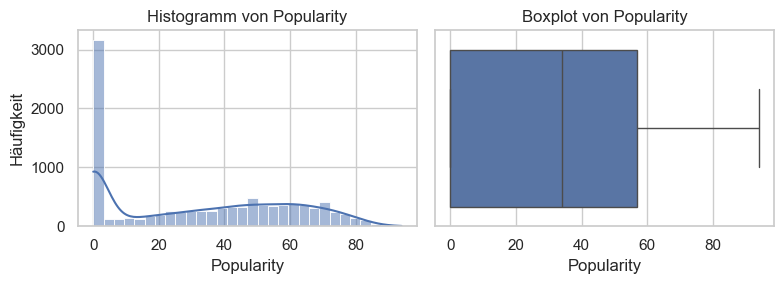

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


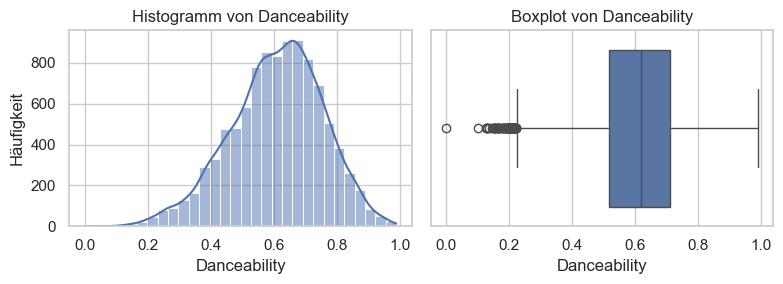

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


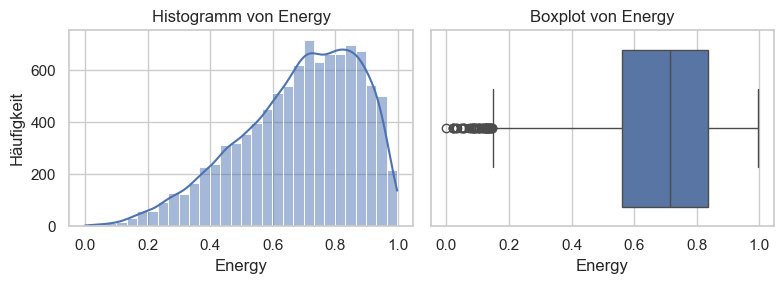

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


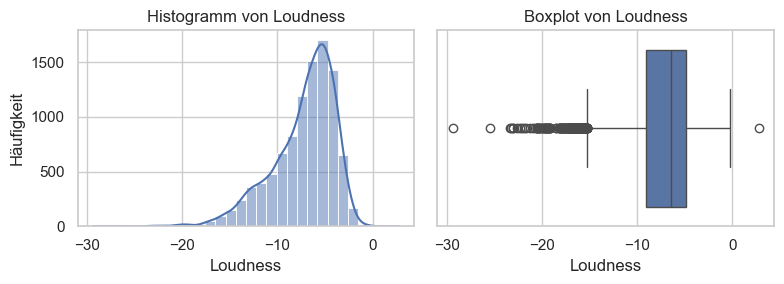

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


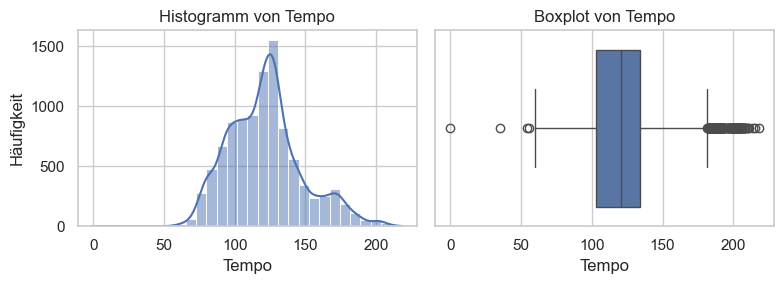

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


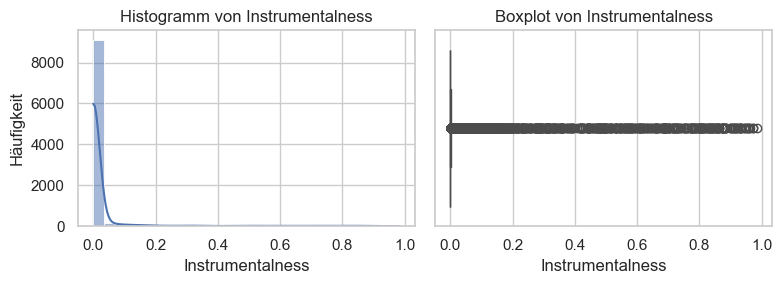

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


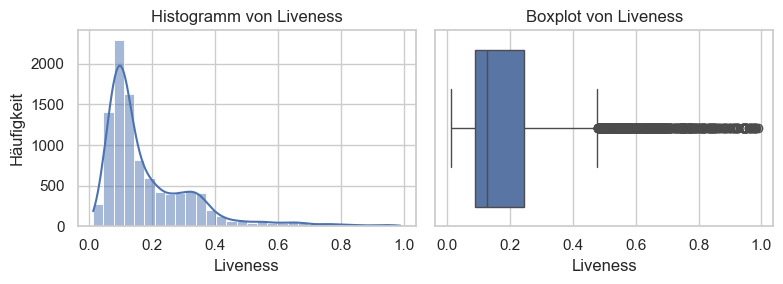

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


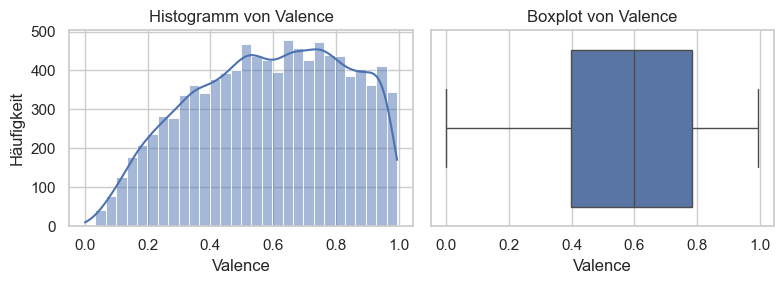

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


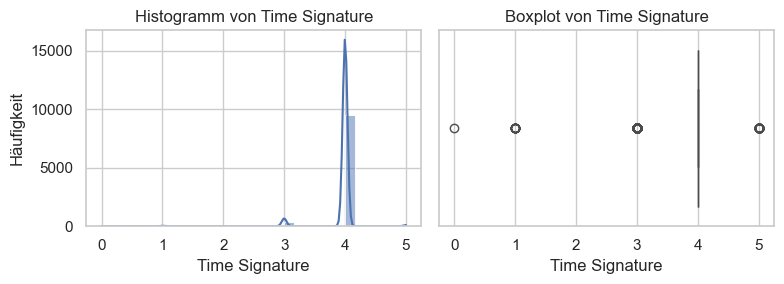

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


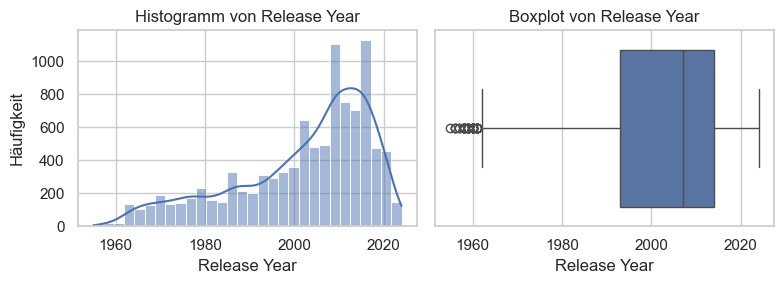

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


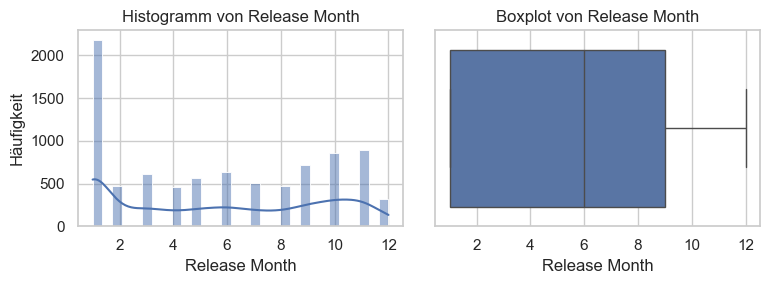

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


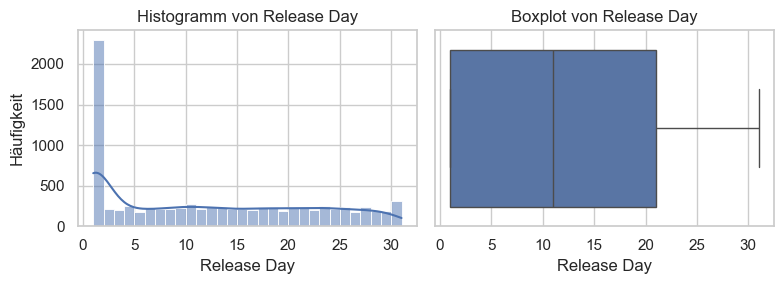

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Liste der zu analysierenden Variablen
variables = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Tempo', 'Instrumentalness', 'Liveness', 'Valence', 'Time Signature', 'Release Year', 'Release Month', 'Release Day']

# Erstelle Histogramme und Boxplots
for var in variables:
    plt.figure(figsize=(8, 3))
    
    # Histogramm
    plt.subplot(1, 2, 1)
    sns.histplot(df1[var], bins=30, kde=True)
    plt.title(f'Histogramm von {var}')
    plt.xlabel(var)
    plt.ylabel('Häufigkeit')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[var])
    plt.title(f'Boxplot von {var}')
    
    plt.tight_layout()
    plt.show()


Die grafische Darstellung der einzelnen Werte bestätigt größtenteils noch mal, was wir in den Zahlen schon gesehen haben:

- Popularity - ziemlich niedrig und recht gleichmäßig verteilt
- Danceability - eine Häufung im oberen, mittleren Bereich, der IQR ist recht niedrig
- Energy - Eher hohe Werte für Energy in den Song
- Loudness - Die Werte für Loudness treten gehäuft zwischen -7 und -4 auf
- Tempo - auch das Tempo ist zwischen 100 und 140 am stärksten vertreten, mit klaren Häufungen um 120-130
- Valence - die Stimmung ist recht breit verteilt, aber eher im positiven Bereich über 0.5 vertreten
- Instrumentalness - dieser Wert scheint nicht viel auszusagen
- Liveness - wie schon in den Zahlen gesehen, gibt es nur wenige Songs mit hohene Liveness-Werten, die allermeisten Songs werden Studioproduktionen sein.
- Time Signature - auch hier wie erwartet ist die absolute Mehrheit der Songs im 4/4 Takt.
- Release Year - die meisten Songs sind nach 2000 veröffentlicht worden. Deutliche Häufung in den 2010er Jahren
- Release Month - die Veröffentlichungen scheinen sich relativ gleichmäßig über das Jahr zu verteilen, im Jahresende steigen sie noch mal an. Monat 1 ignorieren wir hier, da in vielen Einträgen einfach "Jahr-01-01" stand.
- Release Day - Wenn wir auch hier Tag 1 ignorieren, sind die Werte Tage relativ gleichmäßig über den Monat verteilt.

### Tracknummer auf dem Album

Die Verteilung der Songs auf einem Album folgt hauptsächlich psychologischen Gesichtspunkten: Wenn ein Zuhörer in ein Album reinhört, soll es ihn reinziehen, er soll mitbekommen, was ihn erwartet und Lust auf mehr bekommen. Trotzdem sollte man nicht das ganze "Pulver verschießen" und muss die guten Songs etwas auf das ganze Album verteilen. Spannend wäre hier noch eine weitere Kennzahl, wie viele Tracks es pro Album gibt, um die Zahl einordnen zu können.

Die Tracknummern haben sehr große Ausreißer, Der IQR liegt zwischen Track 1 und 7, tendenziell liegen die Tracks aber eher etwas weiter vorn, der Durchschnittswert liegt bei 4,9, aber die ersten 50% liegen auf den ersten drei Songs.

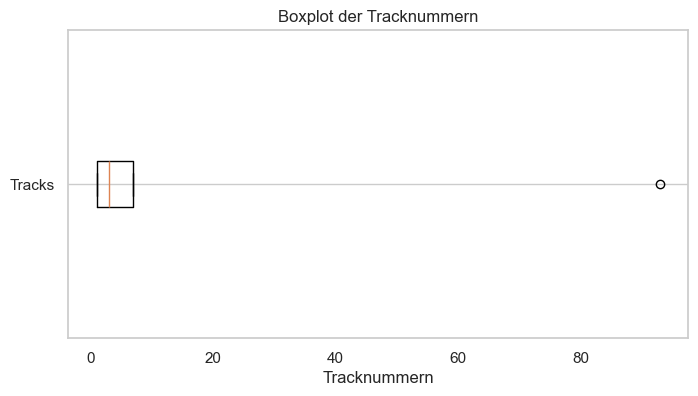

In [8]:
# Importiere die benötigten Bibliotheken
import matplotlib.pyplot as plt
import numpy as np

# Tracknummern (Beispielwerte)
track_numbers = [
    1,  # min
    1,  # 25%
    3,  # median
    7,  # 75%
    93  # max
]

# Erstelle den Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(track_numbers, vert=False)

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Boxplot der Tracknummern')
plt.xlabel('Tracknummern')
plt.yticks([1], ['Tracks'])
plt.grid(axis='x')

# Zeige den Boxplot an
plt.show()

### Länge der Tracks

Bekannte Songs haben oft eine optimale "Radiolänge", die irgendwo um die 3-4 Minuten liegt. Es gibt natürlich Ausreißer und auch viele sehr bekannte Songs gingen fünf Minuten und länger. Nur wenige kürzer. Schauen wir mal, wie es hier aussieht:

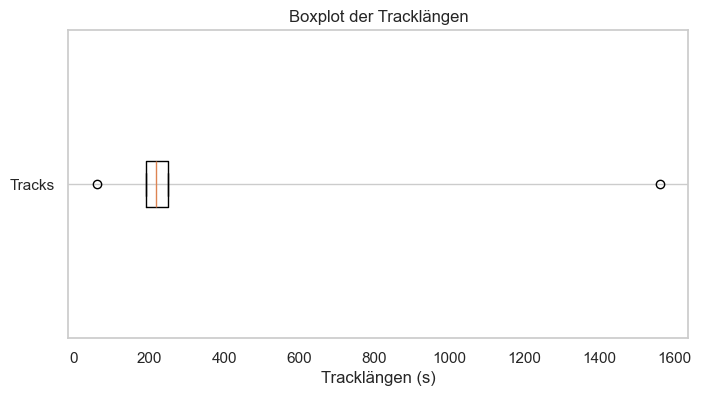

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Tracklängen in Millisekunden (Beispielwerte)
track_lengths_ms = [
    60093/1000,   # min
    192103/1000,  # 25%
    219426/1000,  # median
    249826/1000,  # 75%
    1561133/1000  # max
]

# Erstelle den Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(track_lengths_ms, vert=False)

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Boxplot der Tracklängen')
plt.xlabel('Tracklängen (s)')
plt.yticks([1], ['Tracks'])
plt.grid(axis='x')

# Zeige den Boxplot an
plt.show()


Wie man auf dem Bild sieht, sind die Ausreißer sehr groß. Der Interquartielsabstand reicht von 3 Minuten und 12 Sekunden bis 4 Minuten und 9 Sekunden. Der Durchschnittswert von 224 Sekunden, also etwa 3m44s, liegt damit ziemlich in der Mitte der Quartile. Diese liegen bei:
- 25. Perzentil: 192.103 Millisekunden (3 Minuten und 12 Sekunden) – 25 % der Tracks sind kürzer als dieser Wert.
- 50. Perzentil: 219.426 Millisekunden (3 Minuten und 39 Sekunden) – die Hälfte der Tracks ist kürzer als dieser Wert.
- 75. Perzentil: 249.826 Millisekunden (4 Minuten und 9 Sekunden) – 75 % der Tracks sind kürzer als dieser Wert.
 
Damit liegen die meisten Songs über drei und unter vier Minuten Lauflänge. Das war etwa erwartbar. Die Streuung ist sehr groß, aber der größte Teil ist doch in diesem recht kleinen Bereich zusammengefasst.

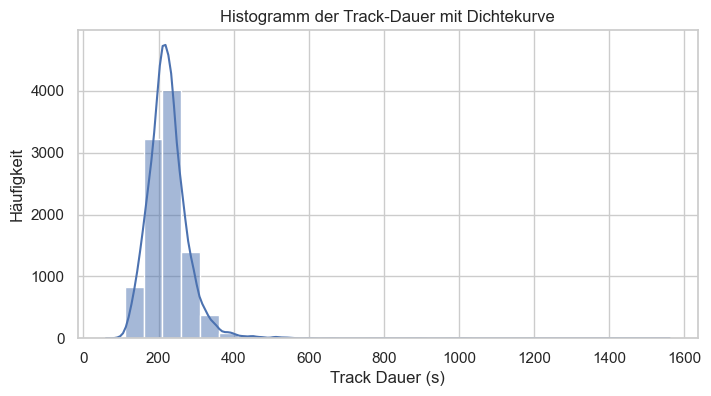

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(8, 4))
sns.histplot(df1['Track Duration (ms)']/1000, bins=30, kde=True)
plt.title('Histogramm der Track-Dauer mit Dichtekurve')
plt.xlabel('Track Dauer (s)')
plt.ylabel('Häufigkeit')
plt.show()


Die Form sieht glockenförmig, aber sehr spitz aus. Testen wir einmal auf Normalverteilung:

In [11]:
#Shapiro-Wilk-Test
shapiro_test = stats.shapiro(df1['Track Duration (ms)'])
print('Shapiro-Wilk Teststatistik:', shapiro_test.statistic)
print('p-Wert:', shapiro_test.pvalue)

print()

# Kolmogorov-Smirnov-Test
ks_test = stats.kstest(df1['Track Duration (ms)'], 'norm', args=(df1['Track Duration (ms)'].mean(), df1['Track Duration (ms)'].std()))
print('KS-Teststatistik:', ks_test.statistic)
print('p-Wert:', ks_test.pvalue)

Shapiro-Wilk Teststatistik: 0.8830510419822691
p-Wert: 1.9743923293288505e-65

KS-Teststatistik: 0.07526134204129531
p-Wert: 1.130949721446104e-49


\\?\C:\Users\jakob\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9993.
  res = hypotest_fun_out(*samples, **kwds)


Obwohl es eine glockenartige Verteilung der Songlängen zu beobachten ist, sagen die statistischen Tests, dass die Werte nicht sehr stark von der Normalverteilung abweichen (Shapiro-Wilk-Test: möglichst nah an der 1, Kolmogorov-Smirnov-Test: möglichst nah an der 0). Die Abweichung ist nicht sehr groß, dafür ist der Testwert aber signifikant. 

### Verteilung der Tonarten

In [12]:
import plotly.express as px
import pandas as pd

# Zähle die Anzahl der Tracks für jede Tonart
key_counts = df1['Key'].value_counts().sort_index()

# Erstelle ein DataFrame für Plotly
df_plot = pd.DataFrame({
    'Tonart': key_counts.index,
    'Anzahl der Tracks': key_counts.values
})

# Definiere die Zuordnung von Zahlen zu Tonarten
key_mapping = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'}

# Aktualisiere die Tonarten im DataFrame
df_plot['Tonart'] = df_plot['Tonart'].map(key_mapping)

# Erstelle das Balkendiagramm mit Plotly
fig = px.bar(df_plot, x='Tonart', y='Anzahl der Tracks',
             title='Verteilung der Tonarten (Keys)',
             labels={'Tonart': 'Tonart', 'Anzahl der Tracks': 'Anzahl der Tracks'},
             text='Anzahl der Tracks',
             color='Tonart',  # Färbe die Balken nach Tonart
             color_discrete_sequence=px.colors.qualitative.Set2)  # Verwende eine kategorische Farbpalette

# Füge Mouseover-Informationen hinzu
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Setze die y-Achse auf einen Maximalwert von 1500
fig.update_layout(yaxis=dict(range=[0, 1500]))
fig.update_layout(showlegend=False)

# Zeige das Diagramm an
fig.show()


Am häufigsten kommen die Tonarten C, G, A und D vor. Mit Abstand am seltensten nutzen Songs D#. Der Rest pendelt sich um 600-900 Songs ein. 

### Verteilung von Dur und Moll

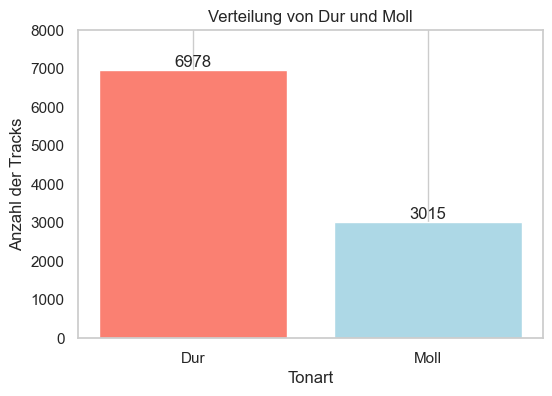

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Anzahl der Tracks in Dur und Moll
mode_counts = df1['Mode'].value_counts()

# Erstelle das Balkendiagramm
plt.figure(figsize=(6, 4))
bars = plt.bar(['Dur', 'Moll'], mode_counts, color=['salmon', 'lightblue'])
plt.title('Verteilung von Dur und Moll')
plt.xlabel('Tonart')
plt.ylabel('Anzahl der Tracks')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.ylim(0, 8000)
# Füge die absoluten Zahlen auf die Balken hinzu
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Zeige das Diagramm an
plt.show()


Mehr als 2/3 der Songs sind in Dur. 
Dur wird als Tonart eher positiv wahrgenommen und mit einer positiven Grundstimmung verbundne. Da die Songs ja eher positiv, tanzbar und energetisch sind, passt dieses Ergebnis gut dazu.
Weiter unten schauen wir uns noch die Verteilung zwischen Dur/Moll und den Tonarten an.

### Release Daten

Interessant ist natürlich auch anzuschauen, wie die Songs verteilt sind, also wann welches Lied rauskam. Dabei muss man aber bedenken, dass einige Songs, wenn sie bei Spotify hochgeladen werden, nicht mit ihrem ursprünglichen "analogen" Releasetermin eingestellt werden. Dementsprechend sollte die Verteilung der Songs eher auf der modernen Seite sein. 

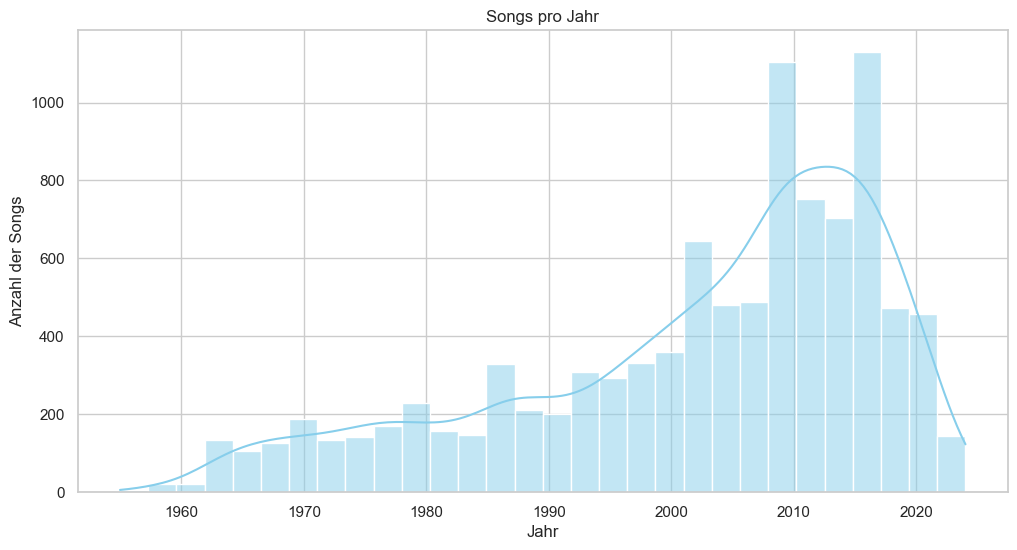

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Release Year', bins=30, kde=True, color='skyblue')
plt.title('Songs pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Songs')
plt.grid(True)
plt.show()


release_year_stats = df1['Release Year'].describe()
print(release_year_stats)


In [15]:
release_year_stats = df1['Release Year'].describe()
print(release_year_stats)


count    9993.000000
mean     2001.915941
std        15.292025
min      1955.000000
25%      1993.000000
50%      2007.000000
75%      2014.000000
max      2024.000000
Name: Release Year, dtype: float64


Es zeigt sich, dass die meisten Songs aus dieser Auswahl in den 2000ern heruasgekommen sind, doch die Songs bis 1990 sind immerhin mit größtenteils 100-200 Songs vertreten.

## 3. Bivariate Analysen

### Entwicklung der Songlängen

In diesem Teil schauen wir uns die Zusammenhänge zwischen den univariaten Teilen an. Mein besonderes Interesse liegt hier bei der Entwicklung der Werte über die Zeit, sowie den impliziten Zusammenhängen einzelner Spotify-Attribute. 
Meine Frage ist auch hier: Gibt es Zusammenhänge und Auffälligkeiten bei den 10 000 erfolgreichsten Songs? Was ist mit der Verteilung der Tonarten und von Dur und Moll?

Fangen wir an mit der Entwicklung der Songlängen, oben haben wir ja gesehen, dass die Durchschnittslänge bei 3:44 liegt, aber verändert sich dieser Trend über die Jahre? Schauen wir es uns an:

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



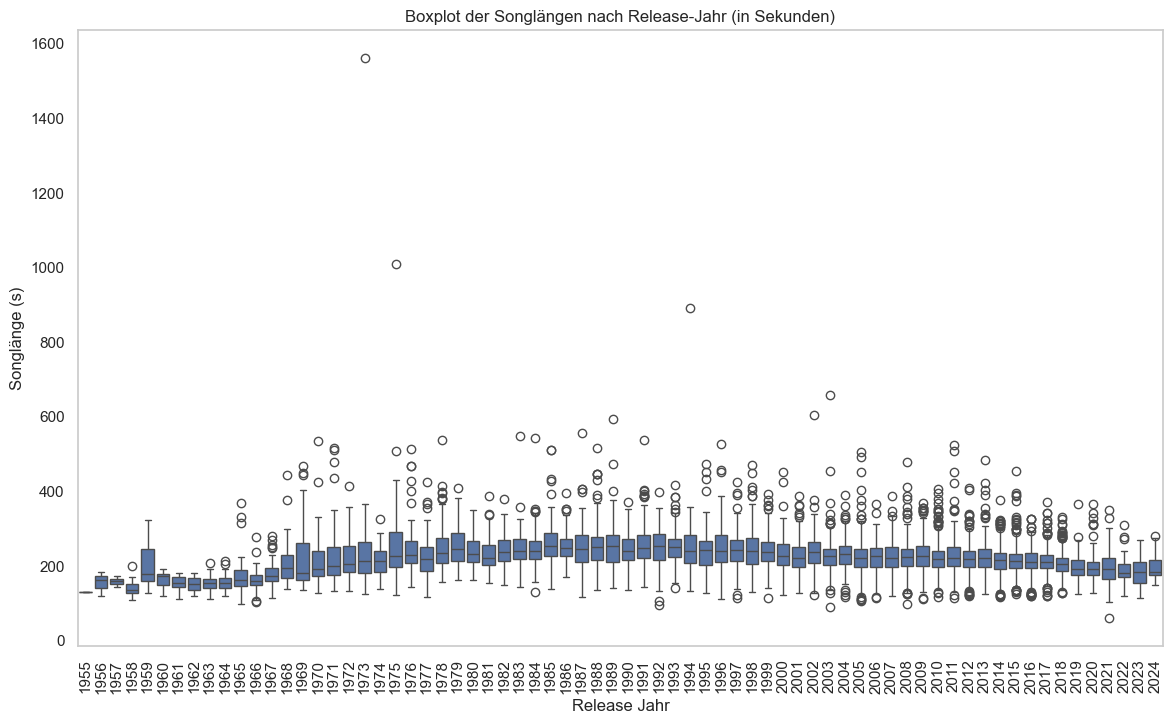

In [16]:
#Entwicklung der Songlängen über die Jahre:

df1['Track Duration (s)'] = df1['Track Duration (ms)'] / 1000

plt.figure(figsize=(14, 8))
sns.boxplot(data=df1, x='Release Year', y='Track Duration (s)')
plt.xticks(rotation=90)
plt.title('Boxplot der Songlängen nach Release-Jahr (in Sekunden)')
plt.xlabel('Release Jahr')
plt.ylabel('Songlänge (s)')
plt.grid(axis='y')
plt.show()


Wir sehen hier einige starke Ausreßer, wenn wir die mal ignorieren und den Plot nur bis 600 Sekunden (immerhin 10 Minuten Songlänge) gehen lassen, nähern wir uns dem Durchschnittswert:

C:\Users\jakob\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



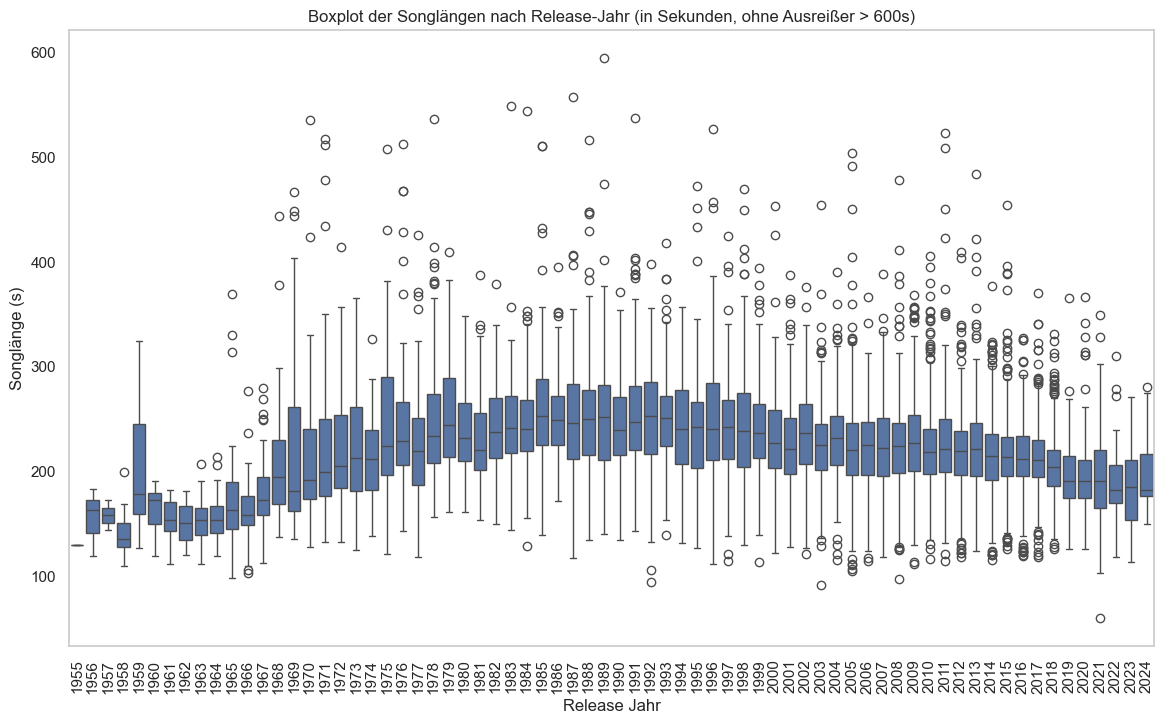

In [17]:
df_filtered = df1[df1['Track Duration (s)'] <= 600]


plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='Release Year', y='Track Duration (s)')
plt.xticks(rotation=90)
plt.title('Boxplot der Songlängen nach Release-Jahr (in Sekunden, ohne Ausreißer > 600s)')
plt.xlabel('Release Jahr')
plt.ylabel('Songlänge (s)')
plt.grid(axis='y')
plt.show()


Ich finde diesen Plot sehr aussagekräftig, aber zum selbst erkunden hier noch eine Plotly-Version mit Mouse-Over:

In [18]:
import pandas as pd
import plotly.express as px

# Beispiel DataFrame (df1) erstellen, falls nicht vorhanden
# df1 = pd.DataFrame({
#     'Release Year': [2020, 2020, 2021, 2021, 2022, 2022],
#     'Track Duration (s)': [200, 300, 400, 500, 600, 700]
# })

# Filtere das DataFrame
df_filtered = df1[df1['Track Duration (s)'] <= 600]

# Erstelle den Boxplot mit Plotly
fig = px.box(df_filtered, 
              x='Release Year', 
              y='Track Duration (s)', 
              title='Boxplot der Songlängen nach Release-Jahr (in Sekunden, ohne Ausreißer > 600s)',
              labels={'Release Year': 'Release Jahr', 'Track Duration (s)': 'Songlänge (s)'})

# Füge Hover-Informationen hinzu
fig.update_traces(hovertemplate='Quartile: %{q1}<br>Median: %{median}<br>Mean: %{mean}<br>Max: %{max}<br>Min: %{min}',
                  marker_color='darkblue')  # Setze die Farbe auf skyblue
fig.update_layout(height=800,  # Höhe auf 800 Pixel setzen
                  plot_bgcolor='white')

# Zeige den Plot an
fig.show()


Jetzt, wo wir etwas näher dran sind, sehen wir eine spannende Entwicklung - am Anfang sind die Songs kürzer, ab etwa 1968 steigen die Längen bis etwa 1978. Dann pegeln sie sich auf einem recht hohen Niveau ein, um dann ab etwa 1996-2005 wieder zu sinken. Zwischen 2005 und 2017 pendelt es sich auf einem niedrigeren Niveau wieder ein und sackt dann noch mal deutlich ab.
Berechnen wir die Meridiane für die beobachteten Perioden genauer:

In [19]:
import pandas as pd

# Songlängen in Sekunden berechnen
df1['Track Duration (s)'] = df1['Track Duration (ms)'] / 1000

# Zeiträume definieren
time_periods = {
    '1955-1967': (1955, 1967),
    '1968-1978': (1968, 1978),
    '1978-1996': (1978, 1996),
    '1996-2005': (1996, 2005),
    '2005-2017': (2005, 2017),
    '2017-2024': (2017, 2024)
}

# Mediane der Songlängen für die Zeiträume berechnen
median_durations = {}
for period, (start, end) in time_periods.items():
    median_duration = df1[(df1['Release Year'] >= start) & (df1['Release Year'] <= end)]['Track Duration (s)'].median()
    median_durations[period] = median_duration

# Ergebnisse ausgeben
for period, median_duration in median_durations.items():
    print(f'Median der Songlängen für {period}: {median_duration:.2f} Sekunden')



Median der Songlängen für 1955-1967: 159.85 Sekunden
Median der Songlängen für 1968-1978: 215.16 Sekunden
Median der Songlängen für 1978-1996: 242.67 Sekunden
Median der Songlängen für 1996-2005: 230.11 Sekunden
Median der Songlängen für 2005-2017: 218.38 Sekunden
Median der Songlängen für 2017-2024: 199.44 Sekunden



Von 1955 bis 1967 etwa waren die Stücke ziemlich kurz, der Median liegt bei 159 Sekunden, also 2 Minuten und 40 Sekunden.
1968 bis 1978 stieg die Dauer der Songs ziemlich kontinuierlich an, der Median für diese Phase liegt schon bei 215 Sekunden, also 3 Minuten und 35 Sekunden.
1978 bis 1996 pendelt es sich auf einem recht hohen Wert von 242 Sekunden ein, das sind etwa 4 Minuten.
In der Zeit von 1996 bis 2005 sinkt die Dauer wieder, der Median liegt hier bei 230 Sekunden, also etwa 3 Minuten und 40 Sekunden.
Zwischen 2005 und 2017 pendelt es sich wieder auf einem etwas niedrigeren Wert ein, 218 Sekunden, das sind 3 Minuten und 38 Sekunden.
Um 2017 sinken die Werte plötzlich und pendeln sich auf einem niedrigeren Wert ein, jetzt haben wir 199 Sekunden als Median, das sind 3 Minuten und 19 Sekunden.

Die großen Ausreißer haben den Trend nicht stark beeinflusst.

Wir sehen, die Dauer der Songs ist im Fluss, erst kurz, dann länger, eine ganze Weile blieben sie lang und wurden dann wieder kürzer. 
Man könnte diese Werte gut mit den technischen Entwicklungen der Zeit gegenlesen, der Sprung von Schallplatte auf CD, die Hochzeit des modernen Radios, die Digitalisierung der Musikindustrie - Youtube, Spotify und TikTok haben ihre ganz eigenen Erfolgsformeln und davon sind auch die Songs mit beeinflusst.


### Verteilung von Dur und Moll

Als nächstes suchen wir nach weiteren Zeitlichen Entwicklungen: Wie ist die Verteilung von Dur und Moll über die Jahre, wie die Verteilung der Akkorde?

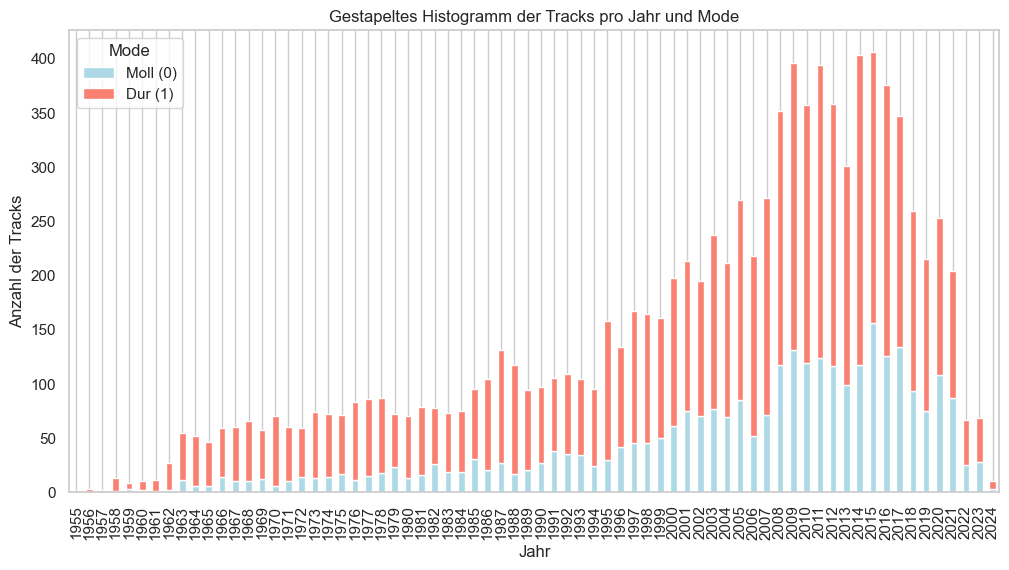

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zähle die Anzahl der Tracks pro Jahr und Mode
hist_data = df1.groupby(['Release Year', 'Mode']).size().unstack(fill_value=0)

# Erstelle das gestapelte Histogramm
hist_data.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(12, 6))

plt.title('Gestapeltes Histogramm der Tracks pro Jahr und Mode')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Tracks')
plt.xticks(rotation=90)
plt.legend(title='Mode', labels=['Moll (0)', 'Dur (1)'])
plt.grid(axis='y')
plt.show()



Hier sehen wir, dass die meisten Stücke in Dur geschrieben sind. Es sieht aus, als ob Moll aber im Laufe der Jahre zunimmt. Schauen wir uns das in einem relativen Diagramm an:

In [21]:
import pandas as pd
import plotly.graph_objects as go

# Zähle die Anzahl der Tracks pro Jahr und Mode
hist_data = df1.groupby(['Release Year', 'Mode']).size().unstack(fill_value=0)

# Berechne die relativen Werte
relative_data = hist_data.div(hist_data.sum(axis=1), axis=0)

# Erstelle das gestapelte Histogramm
fig = go.Figure()

# Füge die Spuren für jeden Modus hinzu
for mode in relative_data.columns:
    fig.add_trace(go.Bar(
        x=relative_data.index,
        y=relative_data[mode],
        name='Dur (1)' if mode == 1 else 'Moll (0)',
        hoverinfo='y+text',
        text=relative_data[mode].apply(lambda x: f'{x:.2%}'),  # Zeige relative Werte in Prozent an
        marker=dict(color='lightblue' if mode == 0 else 'salmon')
    ))

# Aktualisiere das Layout
fig.update_layout(
    title='Gestapeltes Histogramm der Tracks pro Jahr und Mode',
    xaxis_title='Jahr',
    yaxis_title='Relative Anzahl der Tracks',
    barmode='stack',
    legend_title='Mode',
    xaxis=dict(tickmode='linear'),
)

# Zeige die Grafik an
fig.show()


Hier sehen wir, dass die Moll in den Songs bis 1978 eher weniger stark vertreten ist. Danach wird es etwas häufiger genutzt und ab etwa 1990 wird es deutlich häufiger. Nach 2014 steigt die Anzahl der Songs in Moll als auch noch mal ein bisschen. Wir sehen also einen ansteigenden Trend. 

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Definiere die Zeitintervalle
intervals = {
    '1955-1978': (1955, 1978),
    '1978-1990': (1978, 1990),
    '1990-2014': (1990, 2014),
    '2014-2024': (2014, 2024)
}

# Erstelle eine Liste für die Ergebnisse
results_list = []

# Berechne die Verteilung für jedes Intervall
for interval, (start, end) in intervals.items():
    # Filtere die Daten für das aktuelle Intervall
    filtered_data = df1[(df1['Release Year'] >= start) & (df1['Release Year'] < end)]
    
    # Zähle die Anzahl der Tracks pro Mode
    mode_counts = filtered_data['Mode'].value_counts()
    
    # Füge die Ergebnisse zur Liste hinzu
    results_list.append({
        'Interval': interval,
        'Dur (1)': mode_counts.get(1, 0),
        'Moll (0)': mode_counts.get(0, 0)
    })

# Erstelle ein DataFrame aus der Liste
results = pd.DataFrame(results_list)

# Berechne die relativen Werte
results['Total'] = results['Dur (1)'] + results['Moll (0)']
results['Dur (1) %'] = results['Dur (1)'] / results['Total']
results['Moll (0) %'] = results['Moll (0)'] / results['Total']

# Erstelle das gestapelte Histogramm
fig = go.Figure()

# Füge die Spuren für jeden Modus hinzu

fig.add_trace(go.Bar(
    x=results['Interval'],
    y=results['Moll (0) %'],
    name='Moll (0)',
    hoverinfo='y+text',
    text=results['Moll (0) %'].apply(lambda x: f'{x:.2%}'),
    marker=dict(color='lightblue')
))

fig.add_trace(go.Bar(
    x=results['Interval'],
    y=results['Dur (1) %'],
    name='Dur (1)',
    hoverinfo='y+text',
    text=results['Dur (1) %'].apply(lambda x: f'{x:.2%}'),
    marker=dict(color='salmon')
))

# Aktualisiere das Layout
fig.update_layout(
    title='Verteilung von Dur (1) und Moll (0) in verschiedenen Zeitintervallen',
    xaxis_title='Zeitintervall',
    yaxis_title='Relative Anzahl der Tracks',
    barmode='stack',
    legend_title='Mode',
)

# Zeige die Grafik an
fig.show()


In diesem Plot sieht man die Entwicklung noch mal genauer, hier habe ich die Abschnitte gebündelt.

Man sieht, dass Moll in dem Datensatz über die Jahre an Bedeutung zunimmt.

### Verteilung von Moll und Dur über die Tonarten

In [23]:
import pandas as pd
import plotly.express as px

# Erstelle einen neuen DataFrame mit den benötigten Spalten
df_temp = df1[['Key', 'Mode']].copy()

# Umbenennen der Key-Werte
df_temp['Key'] = df_temp['Key'].map({
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 
    4: 'E', 5: 'F', 6: 'F#', 7: 'G', 
    8: 'G#', 9: 'A', 10: 'A#', 11: 'H'
})

# Umbenennen der Modus-Werte
df_temp['Mode'] = df_temp['Mode'].map({0: 'Moll', 1: 'Dur'})  # Umbenennen der Modus-Werte

# Zähle die Anzahl der Tracks für jede Tonart und deren Modus (Dur/Moll)
key_mode_counts = df_temp.groupby(['Key', 'Mode']).size().reset_index(name='Count')

# Berechne die Gesamtanzahl der Tracks pro Tonart
total_counts = key_mode_counts.groupby('Key')['Count'].transform('sum')
key_mode_counts['Percentage'] = (key_mode_counts['Count'] / total_counts) * 100

# Erstelle den Plotly-Balkendiagramm mit benutzerdefinierten Farben
fig = px.bar(key_mode_counts, 
             x='Key', 
             y='Count', 
             color='Mode', 
             text='Percentage',
             labels={'Count': 'Anzahl der Tracks', 'Key': 'Tonart'},
             title='Verteilung der Tonarten (Keys) in Dur und Moll',
             hover_data={'Percentage': ':.2f'},
             color_discrete_map={'Dur': 'salmon', 'Moll': 'lightblue'})  # Benutzerdefinierte Farben

# Anpassungen für das Layout
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(barmode='stack', xaxis_title='Tonart', yaxis_title='Anzahl der Tracks',
                  yaxis=dict(range=[0, 1500]))  # Setze den Bereich der Y-Achse

# Zeige das Diagramm an
fig.show()

# Lösche den temporären DataFrame
del df_temp


In dieser Verteilung sehen wir, dass C die häufigste Tonart ist, gefolgt von G und D, sowie A.
Dur ist fast überall am stärksten vertreten, nur bei der Tonart H dominiert Moll mit 55%. F#-Moll schafft es immerhin auf 46%. Da diese beiden die Paralleltonarten von D-Dur und A-Dur sind, die wiederum ja sehr stark vertreten sind, passt das Ganze gut ins Bild. 

### Weitere Beobachtungen über die Zeit

Sehen wir uns die Entwicklung von Acousticness über die Zeit an - in den 50er Jahren gab es noch keine Synthesizer oder vom gesampelte Instrumente. Da sollte sich etwas verändert haben.

C:\Users\jakob\AppData\Local\Temp\ipykernel_16180\1254430743.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



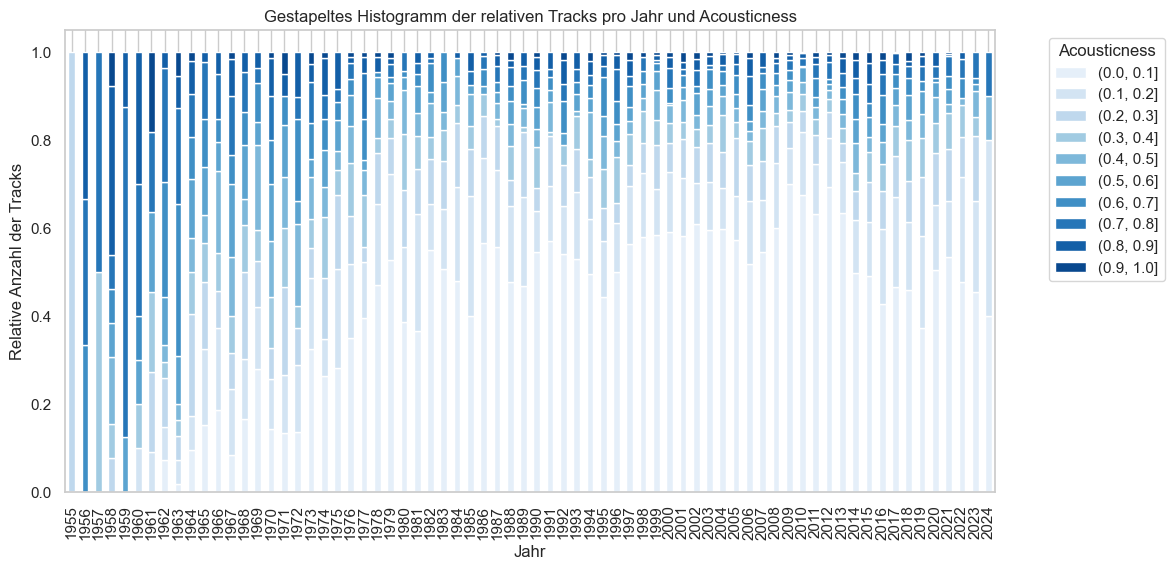

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Erstelle Bins für Acousticness
bins_acousticness = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Zähle die Anzahl der Tracks pro Jahr und Acousticness-Bin
acousticness_data = df1.copy()
acousticness_data['Acousticness Bin'] = pd.cut(acousticness_data['Acousticness'], bins=bins_acousticness)

# Zähle die Anzahl der Tracks pro Jahr und Acousticness-Bin
acousticness_hist = acousticness_data.groupby(['Release Year', 'Acousticness Bin']).size().unstack(fill_value=0)

# Berechne die relative Häufigkeit
relative_acousticness_hist = acousticness_hist.div(acousticness_hist.sum(axis=1), axis=0)

# Erstelle das gestapelte Histogramm für relative Acousticness
relative_acousticness_hist.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette("Blues", len(relative_acousticness_hist.columns)))

plt.title('Gestapeltes Histogramm der relativen Tracks pro Jahr und Acousticness')
plt.xlabel('Jahr')
plt.ylabel('Relative Anzahl der Tracks')
plt.xticks(rotation=90)
plt.legend(title='Acousticness', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()


In diesem Diagramm sieht man schön, dass die "Acousticness", also sozusagen die "handgemachte" Musik nach den 70er Jahren stark abnahm. Seit den 80er jahren, in denen der Synthie-Pop dominierte, kamen immer mal wieder "akustische Wellen", vielleicht gab es bestimmte musikalische Vorlieben in dieser Zeit. Seit etwa 2013 ist es wieder etwas ausgeglichener, das könnte daran liegen, dass es eine Gegenbewegung zu mehr akustischer Musik gibt, oder dass die elektronisch erzeugte Musik sich klanglich der akustischen Musik wieder angenähert hat. Unklar ist dabei, ob akustische Instrumente nur unverstärkte Instrumente sind, oder auch z.B. E-Gitarren als akustisches Instrument zählen.

Schauen wir uns die Entwicklung der Speechiness über die Jahre an:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Erstelle ein DataFrame mit den durchschnittlichen Speechiness-Werten pro Jahr
mean_speechiness_per_year = speechiness_data.groupby('Release Year')['Speechiness'].mean()

# Erstelle das Histogramm für die durchschnittliche Speechiness pro Jahr
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_speechiness_per_year.index, y=mean_speechiness_per_year.values, color='skyblue')

# Berechne den Gesamtmittelwert der Speechiness
overall_mean_speechiness = speechiness_data['Speechiness'].mean()

# Füge die Mittelwertlinie hinzu
plt.axhline(y=overall_mean_speechiness, color='red', linestyle='--', label='Gesamtmittelwert Speechiness')

plt.title('Entwicklung der durchschnittlichen Speechiness über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Speechiness')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()


NameError: name 'speechiness_data' is not defined

An diesem Diagramm sieht man, dass der Wortanteil in den Songs seit den 2000ern stark zugenommen hat - meine Interpretation wäre hier, dass die Rapmusik und die moderen Popmusik zu diesem Zeitpunkt in der Gesellschaft so richtig angekommen ist.

Als nächstes schauen wir uns die Entwicklung der Loudness, also der wahrgenommenen Lautstärke in dB über die Jahre an:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Erstelle ein DataFrame mit den durchschnittlichen Loudness-Werten pro Jahr
mean_loudness_per_year = speechiness_data.groupby('Release Year')['Loudness'].mean()

# Erstelle das Histogramm für die durchschnittliche Loudness pro Jahr
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_loudness_per_year.index, y=mean_loudness_per_year.values, color='lightcoral')

# Berechne den Gesamtmittelwert der Loudness
overall_mean_loudness = speechiness_data['Loudness'].mean()

# Füge die Mittelwertlinie hinzu
plt.axhline(y=overall_mean_loudness, color='red', linestyle='--', label='Gesamtmittelwert Loudness')

plt.title('Entwicklung der durchschnittlichen Loudness über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Loudness')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()


NameError: name 'speechiness_data' is not defined

Wie man sieht, lag der durchschnittliche Loudness-Wert (mit Schwankungen) bis etwa 1990 relativ stabil zwischen -8 und -10.
Seit 1990 nähert er sich aber mehr der 0 an, was bedeutet, dass die Stücke lauter werden. 2012 gab es einen vorübergehenden Höchststand. Das war die Zeit, in der Dubstep erfolgreich war. 
Danach waren die Stücke bis etwa 2020 wieder etwas leiser und steigen aber seit 2022 wieder in der Lautstärke. 
Achtung hier: Die absolute Verteilung der Stücke sollte hier berücksichtigt werden, nach 2021 werden es wieder weniger Samples.

Die Entwicklung seit den 1990ern hat auch mit der Entwicklung der digitalen Medien, der digitalen Aufnahme und der CD zu tun - durch die neuen Werkzeuge konnte eine höhere Lautstärke bei guter Qualität erzielt werden.

Schauen wir uns noch die Verteilung der Popularität über die Jahre an:

In [3]:
import pandas as pd
import plotly.express as px

# Berechne die durchschnittliche Popularität pro Release Jahr
avg_popularity_per_year = df1.groupby('Release Year')['Popularity'].mean().reset_index()

# Erstelle das Balkendiagramm mit Plotly
fig = px.bar(avg_popularity_per_year, x='Release Year', y='Popularity',
             title='Durchschnittliche Popularität pro Release Jahr',
             color_discrete_sequence=['lightblue'],
             labels={'Release Year': 'Release Jahr', 'Popularity': 'Durchschnittliche Popularität'},
             text='Popularity')  # Zeige die Popularität auf den Balken an

# Füge Mouseover-Informationen hinzu
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Setze die Layout-Optionen
fig.update_layout(yaxis_title='Durchschnittliche Popularität',
                  xaxis_title='Release Jahr',
                  width=1000, height=600)

# Zeige das Diagramm an
fig.show()


NameError: name 'df1' is not defined

Die durchschnittliche Popularität ist im Bereich zwischen 30 und 40 (von 100). 
Aber Es gib starke Ausreißer bei den sehr alten und den sehr neuen Stücken. Die neuen lassen sich durch die Aktualität (die einen Einfluss auf den Popularity-Wert hat) erklären, die alten Stücke sind etwas überraschend - vielleicht sind sie so populär, weil es relativ wenige sind, die sich durchgesetzt haben und regelmäßig gehört werden.

Als nächstes schauen wir uns noch die Korrelationen zwischen den Werten an.

### Korrelationsmatrix

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten auswählen
numerical_df1 = df1.select_dtypes(include=['float64', 'int64'])

# Korrelationsmatrix berechnen
correlation_matrix = numerical_df1.corr()

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix der Musikmerkmale')
plt.show()
print(correlation_matrix)

### Betrachtung der Korrelationsmatrix 

In der Korrelationsmatrix sehen wir, dass einige Werte recht stark miteinander korrelieren.
So korrelieren Loudness und Energy recht stark miteinander mit einem Wert von 0.68.
Ebenfalls stark korrelieren Acousticness und Energy negativ miteinander mit -0.63.
Weiterhin mittelstark miteinander korrelieren Danceability und Valence mit 0.44 und Loudness mit Release Year mit 0.43.

Diese Werte schauen wir uns noch ein mal genauer an.

Den Zusammenhang zwischen Release Month und Release Day ignorieren wir hier.


### statistische Tests auf Korrelationen

Nun führen wir statistische Tests auf die Korrelationen durch: 

Der Korrelations-Signifikanztest testet, ob die Korrelation statistisch bedeutsam ist.<br>
Das Konfidenzintervall für Korrelation schätzt ab, wie genau die Korrelationsschätzung ist.<br>
Einfache Lineare Regression testet, ob ein Zusammenhang den anderen vorhersagen kann.<br>

In [ ]:
#Test für den Zusammenhang zwischen Energy und Loudness
print("Korrelationstests für den Zusammenhang zwischen 'Energy' und 'Loudness'\n")

import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# Für Energy ↔ Loudness (ersetze die Variablennamen für andere Tests)
correlation, p_value = pearsonr(df1['Energy'], df1['Loudness'])

print(f"Korrelation: {correlation:.4f}")
print(f"P-Wert: {p_value:.6f}")
print(f"Signifikant (p<0.05): {'Ja' if p_value < 0.05 else 'Nein'}")

# Fisher Z-Transformation für Konfidenzintervall
n = len(df1)
z = np.arctanh(correlation)
se = 1/np.sqrt(n-3)
ci_lower = np.tanh(z - 1.96*se)
ci_upper = np.tanh(z + 1.96*se)

print(f"95% Konfidenzintervall: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Lineare Regression (Energy als x, Loudness als y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Loudness'])

print(f"Regressionsgerade: y = {intercept:.4f} + {slope:.4f}*x")
print(f"R² = {r_value**2:.4f}")
print(f"P-Wert der Regression: {p_value:.6f}")
print(f"Standardfehler: {std_err:.4f}")

Auswertung:

r = 0,679 ist eine starke positive Korrelation<br>
P-Wert = 0 hochsignifikantes Ergebnis - dieser Zusammenhang existiert auch in der Spotify-Gesamtpopulation<br>
Konfidenzintervall [0,668 - 0,689] ist sehr schmal - die Einschätzung ist präzise

Regression:

Es gibt einen linearen Zusammenhang, über die Regression eine Formel gefunden werden: 

Loudness = -15,22 + 11,65 × Energy<br>
Ein Song mit Energy = 0,5 hat etwa -9,4 dB Loudness<br>
Ein Song mit Energy = 0,8 hat etwa -5,9 dB Loudness<br>

Steigt Energy um 0,1 Punkte, wird der Song um 1,16 dB lauter

R² = 0,461 bedeutet: Energy erklärt 46% der Varianz in der Lautstärke<br>
Standardfehler = 0,126 ist klein - zuverlässige Schätzung der Regression.

Das bedeutet: Energiereichere Songs sind definitiv lauter produziert! 

Das Ergebnis wundert uns aber nur wenig, da die Spotify-Attribute für Energy die Loudness mit einbeziehen.

In [ ]:
#Test für den Zusammenhang zwischen Energy und Loudness
print("Korrelationstests für den Zusammenhang zwischen 'Energy' und 'Acousticness'\n")

import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# Für Energy ↔ Loudness (ersetze die Variablennamen für andere Tests)
correlation, p_value = pearsonr(df1['Energy'], df1['Acousticness'])

print(f"Korrelation: {correlation:.4f}")
print(f"P-Wert: {p_value:.6f}")
print(f"Signifikant (p<0.05): {'Ja' if p_value < 0.05 else 'Nein'}")

# Fisher Z-Transformation für Konfidenzintervall
n = len(df1)
z = np.arctanh(correlation)
se = 1/np.sqrt(n-3)
ci_lower = np.tanh(z - 1.96*se)
ci_upper = np.tanh(z + 1.96*se)

print(f"95% Konfidenzintervall: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Lineare Regression (Energy als x, Loudness als y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Acousticness'])

print(f"Regressionsgerade: y = {intercept:.4f} + {slope:.4f}*x")
print(f"R² = {r_value**2:.4f}")
print(f"P-Wert der Regression: {p_value:.6f}")
print(f"Standardfehler: {std_err:.4f}")

Auswertung

r = -0,626 ist eine starke negative Korrelation. <br>
P-Wert = 0: hochsignifikantes Ergebnis. <br>
Konfidenzintervall [-0,638 bis -0,614] ist sehr schmal, die Einschätzung ist präzise.

Regression:
Es konnte ein linearer Zusammenhang gefunden werden:

Acousticness = 0,77 - 0,82 × Energy <br>
Steigt Energy um 0,1 Punkte, sinkt Acousticness um 0,082 Punkte<br>
R² = 0,392: Energy erklärt 39% der Varianz in der Akustik<br>
Standardfehler = 0,010 ist sehr klein zuverlässige Schätzung der Regression.

Ein Song mit Energy = 0,2 hat etwa Acousticness = 0,60 (sehr akustisch)<br>
Ein Song mit Energy = 0,8 hat etwa Acousticness = 0,11 (kaum akustisch)

Das bedeutet: 
Je energiegeladener ein Song, desto weniger akustisch ist er! Akustische Instrumente werden eher in ruhigeren, nicht sehr energiegeladenen Songs gespielt.

In [ ]:
#Test für den Zusammenhang zwischen Energy und Loudness
print("Korrelationstests für den Zusammenhang zwischen 'Danceability' und 'Valence'\n")

import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# Für Energy ↔ Loudness (ersetze die Variablennamen für andere Tests)
correlation, p_value = pearsonr(df1['Danceability'], df1['Valence'])

print(f"Korrelation: {correlation:.4f}")
print(f"P-Wert: {p_value:.6f}")
print(f"Signifikant (p<0.05): {'Ja' if p_value < 0.05 else 'Nein'}")

# Fisher Z-Transformation für Konfidenzintervall
n = len(df1)
z = np.arctanh(correlation)
se = 1/np.sqrt(n-3)
ci_lower = np.tanh(z - 1.96*se)
ci_upper = np.tanh(z + 1.96*se)

print(f"95% Konfidenzintervall: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Lineare Regression (Energy als x, Loudness als y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Danceability'], df1['Valence'])

print(f"Regressionsgerade: y = {intercept:.4f} + {slope:.4f}*x")
print(f"R² = {r_value**2:.4f}")
print(f"P-Wert der Regression: {p_value:.6f}")
print(f"Standardfehler: {std_err:.4f}")

Es folgt noch ein Residuen-Test, um zu sehen, ob die lineare Regression überhaupt sinnvolle Werte ergeben kann.

Auswertung:

r = 0,444 ist eine moderate positive Korrelation<br>
P-Wert = 0 bedeutet: hochsignifikant, es gibt auf jeden Fall einen Zusammenhang.<br>
Der Konfidenzintervall [0,428 bis 0,459] ist schmal, die Schätzung ist zuverlässig.

Regression:
Es konnte ein Zusammenhang gefunden werden:<br>
Valence = 0,14 + 0,73 × Danceability
Steigt Danceability um 0,1 Punkte, steigt Valence um 0,073 Punkte
R² = 0,197: Danceability erklärt 19,7% der Varianz in der Fröhlichkeit
Standardfehler = 0,015 ist klein die Regression konnte zuverlässig vorhergesagt werden.

Ein Song mit Danceability = 0,3 hat etwa Valence = 0,36 (eher traurig)
Ein Song mit Danceability = 0,8 hat etwa Valence = 0,73 (sehr fröhlich)
Fazit: Tanzbare Songs sind eher fröhlicher.

Es gibt anscheinen fröhliche und traurige Songs, die tanzbar sind. Tendenziell sind mehr fröhlich. 
Außerdem gibt es noch fröhliche Songs, die nicht tanzbar sind.

Jetzt schauen wir uns noch die Residualverteilung an, wir testen, ob die Daten normalverteilt sind und damit, ob die lineare Regression aussagekräftig ist.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# =============================================================================
# ANALYSE 1: Energy → Loudness
# =============================================================================
print("ANALYSE 1: Energy → Loudness")
print("-" * 40)

# Regression berechnen
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Loudness'])
y_pred = slope * df1['Energy'] + intercept
residuals = df1['Loudness'] - y_pred

# Werte ausgeben
print(f"R²: {r_value**2:.4f}")
print(f"p-Wert: {p_value:.6f}")
print(f"Mittlere Residuen: {np.mean(residuals):.6f}")
print(f"Std. Residuen: {np.std(residuals):.4f}")

# Normalverteilungstest
sample_size = min(5000, len(residuals))
sample_residuals = np.random.choice(residuals, size=sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"Shapiro-Wilk p-Wert: {shapiro_p:.6f} ({'Normal' if shapiro_p > 0.05 else 'Nicht normal'})")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Vorhergesagte Werte')
ax1.set_ylabel('Residuen')
ax1.set_title('Energy → Loudness - Residuen')
ax1.grid(True, alpha=0.3)

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# ANALYSE 2: Energy → Acousticness
# =============================================================================
print("\nANALYSE 2: Energy → Acousticness")
print("-" * 40)

# Regression berechnen
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Acousticness'])
y_pred = slope * df1['Energy'] + intercept
residuals = df1['Acousticness'] - y_pred

# Werte ausgeben
print(f"R²: {r_value**2:.4f}")
print(f"p-Wert: {p_value:.6f}")
print(f"Mittlere Residuen: {np.mean(residuals):.6f}")
print(f"Std. Residuen: {np.std(residuals):.4f}")

# Normalverteilungstest
sample_size = min(5000, len(residuals))
sample_residuals = np.random.choice(residuals, size=sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"Shapiro-Wilk p-Wert: {shapiro_p:.6f} ({'Normal' if shapiro_p > 0.05 else 'Nicht normal'})")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Vorhergesagte Werte')
ax1.set_ylabel('Residuen')
ax1.set_title('Energy → Acousticness - Residuen')
ax1.grid(True, alpha=0.3)

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# ANALYSE 3: Danceability → Valence
# =============================================================================
print("\nANALYSE 3: Danceability → Valence")
print("-" * 40)

# Regression berechnen
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Danceability'], df1['Valence'])
y_pred = slope * df1['Danceability'] + intercept
residuals = df1['Valence'] - y_pred

# Werte ausgeben
print(f"R²: {r_value**2:.4f}")
print(f"p-Wert: {p_value:.6f}")
print(f"Mittlere Residuen: {np.mean(residuals):.6f}")
print(f"Std. Residuen: {np.std(residuals):.4f}")

# Normalverteilungstest
sample_size = min(5000, len(residuals))
sample_residuals = np.random.choice(residuals, size=sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"Shapiro-Wilk p-Wert: {shapiro_p:.6f} ({'Normal' if shapiro_p > 0.05 else 'Nicht normal'})")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Vorhergesagte Werte')
ax1.set_ylabel('Residuen')
ax1.set_title('Danceability → Valence - Residuen')
ax1.grid(True, alpha=0.3)

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Fazit: Wir konnten drei recht stark korrelierende Werte finden und einen direkten Zusammenhang aufzeigen. Die Werte sind aber nicht normalverteilt, weshalb der lineare Zusammenhang fragwürdig ist.
Was wir sagen können: Energy hängt mit Loudness positiv und mit Acousticness negativ zusammen. Die meisten Songs mit akustischen Instrumenten sind also eher ruhig und nicht energiegeladen. Und lautere Songs haben auch mehr Energie, bzw. energische Songs werden lauter gemischt. 
Außerdem hängen Danceability und Valence positiv zusammen, viele Songs sind wohl fröhlich und tanzbar.

### Multiple Regression

Jetzt führen wir noch eine Multiple Regression durch, um zu betrachten, ob die die Werte Danceability, Energy, Loudness und Acousticness einen Einfluss auf Popularity haben.

In [ ]:
#!pip install statsmodels

In [ ]:
import pandas as pd
import statsmodels.api as sm


# Abhängige und unabhängige Variablen definieren
X = df1[['Danceability', 'Energy', 'Loudness',]]  # Unabhängige Variablen
y = df1['Popularity']  # Abhängige Variable

# Konstante hinzufügen
X = sm.add_constant(X)

# Regression durchführen
model = sm.OLS(y, X).fit()

# Ergebnisse anzeigen
print(model.summary())


Leider ist dieses Regressionsmodell nicht gut geeignet, um eine Aussage darüber zu treffen, ob Energy, Loudness und Danceability einen Einfluss auf Popularity haben. R^2 erklärt nur 0,5% der Variation. 
Auch andere Versuche der Multiplen Regression führten zu keinen guten Ergebnissen.

### Clusteranalyse

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Wähle die Variablen für die Clusteranalyse
X = df1[['Danceability', 'Energy', 'Loudness']]

# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means-Clusteranalyse durchführen
kmeans = KMeans(n_clusters=3, random_state=42)  # Anzahl der Cluster
df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster visualisieren
plt.figure(figsize=(10, 6))
plt.scatter(df1['Danceability'], df1['Energy'], c=df1['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clusteranalyse der Tracks')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
cluster_means = df1.groupby('Cluster')[['Danceability', 'Energy', 'Loudness']].mean()
print(cluster_means)


Ich sehe leider keine starke Clusterbildung, anscheinend hängen Danceability, Energy und Loudness nicht statistisch relevant zusammen.

### Fazit der Statistischen Auswertung von DF1

Wir haben einige spannende Punkte gesehen:

- Die Songs sind eher tanzbar und haben eine hohe Energie
- Das Tempo pegelt sich zwischen 120 und 140 ein
- Die meisten Songs sind im 4/4 Takt
- Die meisten Songs sind Studioproduktionen
- Die Stimmung ist eher positiv
- Die häufigsten Tonarten sind: C-Dur, G:Dur, D-Dur und A-Dur
- Nur etwa ein Drittel der Songs sind in Moll

Entwicklungen:

- Die Länge der Songs nimmt über die Jahre ab
- Moll ist über die Jahre stärker vertreten
- Akustische Instrumente sind nur wenig vertreten
- Der Wortanteil hat seit 2001 zugenommen.
- Die Loudness hat über die Jahre zugenommen

Korrelationen:

    -starke Korrelationen:
        - Energy und Loudness korrelieren stark (0.68)
        - Acousticness und Energy korrelieren stark negativ (-0.63)

    - mittelstarke Korrelationen:
        - Danceability und Valence mit (0.44)
        - Loudness und Release Year mit (0.43)

Diese lassen sich aber nicht mit einer linearen Regression vorhersagen.

# 4. Vergleiche zwischen den Datensätzen

In diesem Teil widmen wir uns Gemeinsamkeiten und Unterschiede zwischen den Datensätzen. Wir testen die Erkenntnisse aus df1, indem wir sie an die große Menge von Daten aus df2 anlegen.

In [ ]:
import pandas as pd

# Angenommen, df1 ist bereits definiert

# Schritt 1: Definiere die relevanten Spalten
relevant_columns = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Track Duration (ms)']
# Schritt 2: Erstelle das gefilterte DataFrame
filtered_df1 = df1[relevant_columns]
# Ausgabe des gefilterten DataFrames
print(filtered_df1.describe())


In [ ]:
df2.describe()

Schauen wir uns erstmal die Übersicht an:

Folgende Werte sind durchschnittlich höher in df1:
Danceability, Energy, Loudness, Valence, Tempo, Track duration

Folgende Werte sind durchschnittlich niedriger in df 1:
Speechiness, Acousticness, instrumentalness, liveness

Da uns ja interessiert, ob wir für die 10.000 Top Hits einen Unterschied zu einer sehr viel größeren Menge von Songs finden, ist das schon mal interessant. 

In [ ]:
import pandas as pd

# Schritt 1: Definiere die Mittelwerte für df1 und df2
mean_df1 = [0.608324, 0.684020, -7.252160, 0.065032, 0.208298, 0.029437, 0.185249, 0.586262, 121.530139, 224.2449]
mean_df2 = [0.549939, 0.655932, -7.721341, 0.084838, 0.279062, 0.081318, 0.215593, 0.483790, 122.399803, 232.6746]

# Schritt 2: Erstelle ein DataFrame aus den Mittelwerten
data = {
    'Metrik': [
        'Danceability', 'Energy', 'Loudness', 'Speechiness', 
        'Acousticness', 'Instrumentalness', 'Liveness', 
        'Valence', 'Tempo', 'Track Duration (ms)'
    ],
    'Mean df1': mean_df1,
    'Mean df2': mean_df2
}

comparison_df = pd.DataFrame(data)

# Schritt 3: Berechne die Unterschiede und füge sie als neue Spalte hinzu
comparison_df['Difference'] = comparison_df['Mean df1'] - comparison_df['Mean df2']

# Schritt 4: Zeige die Tabelle an
display(comparison_df)


Wir sehen, dass die Unterschiede nicht sehr groß sind, am stärksten scheinen hier loudness und tempo abzuweichen, wobei dsa Durchschnittstempo in df2 höher ist. Außerdem ist die Durchschnittslänge um etwa 8 Sekunden länger.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Angenommen, df1 und df2 sind bereits definiert

# Mapping der Spaltennamen
columns_mapping = {
    'Danceability': 'danceability',
    'Energy': 'energy',
    'Loudness': 'loudness',
    'Speechiness': 'speechiness',
    'Acousticness': 'acousticness',
    'Instrumentalness': 'instrumentalness',
    'Liveness': 'liveness',
    'Valence': 'valence',
    'Tempo': 'tempo',
    'Track Duration (ms)': 'duration_ms'
}

# Schritt 1: Erstelle die Plots für jede Spalte
for df1_col, df2_col in columns_mapping.items():
    df1_data = df1[df1_col]
    df2_data = df2[df2_col]

    plt.figure(figsize=(12, 6))

    # Histogramm
    plt.subplot(1, 2, 1)
    sns.histplot(df1_data, kde=True, color='blue', bins=30, stat='density', label='df1', alpha=0.5)
    sns.histplot(df2_data, kde=True, color='orange', bins=30, stat='density', label='df2', alpha=0.5)
    plt.title(f'Histogramm für {df1_col}')
    plt.xlabel(df1_col)
    plt.ylabel('Dichte')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    boxplot_data = pd.DataFrame({
        'df1': df1_data,
        'df2': df2_data
    })

    sns.boxplot(data=boxplot_data, palette=['blue', 'orange'])
    plt.title(f'Boxplot für {df1_col}')
    plt.ylabel(df1_col)

    plt.tight_layout()
    plt.show()


### Betrachtung der Werte im Vergleich zwischen df1 und df2

Welche Unterschiede erkennen wir:

Die Songs von df1 sind tanzbarer, haben eine etwas höhere Energie, weniger Sprache, weniger akustische Instrumente, sind etwas weniger live 
gespielt, von der Stimmung her deutlich fröhlicher.

Tempo, Loudness und Songlänge sind sehr ähnlich.


### Statistische Berechnung der Unterschiede

Da die Daten nicht normalverteilt sind, nutzen wir den Mann-Whitney U-Test, um die Mediane zu vergleichen, zusätzlich messen wir die Effektgröße.

In [ ]:
import numpy as np
from scipy import stats

# Ergebnisse speichern
results = []

# Mann-Whitney U-Test für jede relevante Spalte durchführen
for df1_col, df2_col in columns_mapping.items():
    u_stat, p_value = stats.mannwhitneyu(df1[df1_col], df2[df2_col], alternative='two-sided')
    
    # Berechnung der Effektgröße
    n1 = len(df1[df1_col])
    n2 = len(df2[df2_col])
    N = n1 + n2
    z = (u_stat - (n1 * n2 / 2)) / np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
    r = z / np.sqrt(N)
    
    results.append({
        'Column': df1_col,
        'U-statistic': u_stat,
        'p-value': p_value,
        'Effect Size (r)': r
    })

# Ergebnisse in ein DataFrame umwandeln
results_df = pd.DataFrame(results)

# Ausgabe der Ergebnisse
print(results_df)


U-Werte: Höhere Werte = Höhere Unterschiede zwischen den Gruppen
p-Werte: sind alle sehr niedrig, die Unterschiede zwischen den Gruppen sind statistisch relevant

Die Ergebnisse deuten darauf hin, dass es signifikante Unterschiede in der Verteilung der Werte zwischen df1 und df2 in allen getesteten Spalten gibt. 
Nur der p-Wert für das Tempo ist zu hoch, weswegen es hier wohl keine signifikanten Uterschiede gibt.

Die Abweichungen zwischen den einzelnen Werten sind zwar nicht sehr groß, aber sie sind groß genug und statistisch signifikant. Nur beim Tempo sind die Unterschiede nicht statistisch signifikant.

## Fazit

Es gibt statistisch relevante Unterschiede zwischen df1 und df2, aber sie sind nur sehr klein. 

Man kann festhalten, dass die Stimmung (Valence) bei df1 positiver ist, Dancaebility, Loudness und Energy sind stärker.
Dafür sind Speechiness, Acousticness, Instrumentalness und Liveness weniger stark. 
Die Track Duration und das Tempo sind ebenfalls ein wenig niedriger.

Die Unterschiede sind nicht sehr stark, somit lassen sich wohl schwer Regeln ableiten, wie man einen Hit anhand der Spotify-Attribute erkennt.